<div class="alert alert-info">
    <h1><strong>EQCI Day 9: </strong>Assignment</h1>
    <h2>Quantum Teleportation</h2>
</div>

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.extensions import Initialize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# In this programming challenge we will code a Quantum Teleportation protocol!

Before we get ahead of ourselves, let's clarify what we mean by *teleportation*.

I'm sure that when I say teleportation, you may be thinking of something like this:

<img src="https://media2.giphy.com/media/3o7TKLzBYFrRWcXk9q/200.gif" width="200" align="center">

But unfortunately this is not a physical kind of teleportation, instead we are teleporting a *State* - which is more like teleporting information. So it's more along the lines of:

<img src="https://hips.hearstapps.com/pop.h-cdn.co/assets/17/11/768x384/landscape-1489615804-teleportation-1.gif?resize=640:*" width="200" align="center">

*(That's schrodingers cat and it's representing a quantum state)* **If you're interested in where I got that gif, you should check out <a href="https://www.youtube.com/watch?v=DxQK1WDYI_k">this video on teleportation by minute physics.</a>**



### This challenge will have two sections: A <b>Learning Section</b> and a <b>Coding Section</b>

Using our good friends Alice, Bob, and Charlie we will transfer the quantum state $|\Psi \rangle$ from Alice to Bob by only sending two classical bits of information.

There are a few new `Qiskit` things we will need to learn for this challenge:

1. Creating circuits with registers
2. Classical-quantum conditional gates

---
<h2 style="text-align: center; color: darkblue"> Learning Section</h2>

---

## 1. Using Registers

In `Qiskit` a register is collection of either qubits or classical bits, these registers can then be used to create a normal `QuantumCircuit`. This is useful if we want to give specific labels or use more advanced gates like classical-quantum conditional gates. 

Here's an example:
`QuantumRegister(3, name='quantum_register')` will create a quantum register of 3 qubits each with the label name `"quantum_register"`.

<div class="alert alert-info"><b><i>N.B.</i></b> There is some strange behavior with what you can put in the labels, they have to be <b>lower case</b> and only quantum registers can have <b>spaces</b>. Why is this the case? 🤷🏼‍♂️ That's qiskit for you! </div>

#### Let's try out an example:

In [2]:
qr = QuantumRegister(3,name='quantum_register')
qc = QuantumCircuit(qr)
qc.draw()

quantum_register_0: 
                    
quantum_register_1: 
                    
quantum_register_2:

#### We can do the same thing with classical registers too!

In [3]:
qr = QuantumRegister(3,name='quantum_register')
cr = ClassicalRegister(3,name='classical_register')
qc = QuantumCircuit(qr, cr)
qc.draw()

quantum_register_0: 
                      
  quantum_register_1: 
                      
  quantum_register_2: 
                      
classical_register: 3/

<div class="alert alert-info"><b><i>N.B.</i></b> Notice that when a register is made with multiple bits at once, <b>Qiskit</b> enumerates all qubits on separate lines and squashes all classical bits into a single line. This is perfectly normal behavior!</div>

#### Sometimes we need each register to have a unique name
To do this we need to make each register separately:

In [4]:
q_a = QuantumRegister(1, name='quantum_a')
q_b = QuantumRegister(1, name='quanutm_b')

c_a = ClassicalRegister(1, name="classical_a")
c_b = ClassicalRegister(1, name="classical_b")
qc = QuantumCircuit(q_a, q_b, c_a, c_b)
qc.draw()

quantum_a: 
               
    quanutm_b: 
               
classical_a: 1/
               
classical_b: 1/

## 2. Using Classical-Quantum Conditional Gates

In order to complete the teleportation, Bob needs to apply different gates to his qubit depending on which classical bits Alice sends.

We can build this into our circuit with a classical-quantum conditional gate. As the name suggests, these quantum gates are controlled by the classical registers. Think of them as operating with the logic:

```
if classical_0 == 1:
    apply X gate
```

In `Qiskit` classical-quantum conditional gates use the syntax: 
`QuantumCircuit.A(B).c_if(C, D)`

Where:

- A = gate type
- B = target qubit
- C = classical control register
- D = desired activation value

That's a little confusing so lets look at an example:

In [5]:
# First we make our registers
q_0 = QuantumRegister(1, name='q0')
q_1 = QuantumRegister(1, name='q1')
c_0 = ClassicalRegister(1, name='c0')
c_1 = ClassicalRegister(1, name='c1')
# Next we make a quantum circuit
qc = QuantumCircuit(q_0, q_1, c_0, c_1)
# Now we apply the classical-quantum conditional gate
qc.x(0).c_if(c_0, 1)
qc.draw()

┌───┐ 
  q0: ─┤ X ├─
       └─╥─┘ 
  q1: ───╫───
      ┌──╨──┐
c0: 1/╡ 0x1 ╞
      └─────┘
c1: 1/═══════

In this circuit, we created 2 quantum registers and 2 classical registers. We then created added an X gate to qubit `0` and made it conditional on the classical register `c_0` being in the `1` state.

<div class="alert alert-info"><b><i>N.B.</i></b> Notice that the variable names and the labels are different. This is to make it clear that we are passing the <b>variable name</b> into our conditional gate and not the <b>label name</b></div>

---
<h2 style="text-align: center; color: darkblue"> The Protocol</h2>

---
In this experiment we are going to imagine we have three people, Alice, Bob, and Charlie. Alice has a state $|\Psi \rangle$ that she wants to send to Bob. In order to help send her state, Charlie provides Alice and Bob each with an entangled pair of qubits. In the experiment, Alice initially has qubit $Q_0$ (this qubit is in the state $|\Psi\rangle$ that she wants to send Bob), and Charlie distributes $Q_1$ and $Q_2$ to Alice and Bob respectively. 

Using teleportation we can show the state $|\Psi \rangle$ (which is stored on Alice's Qubit $Q_0$) is teleported from qubit $Q_0$ to qubit $Q_2$ on the same circuit. Unlike a swap operation, $Q_2$ and $Q_0$ never have a quantum gate directly connecting them - the only information transferred are two classical bits through the $C_0$ and $C_1$ registers.

Confused? Let me clarify:

Alice starts with $Q_0$,

Charlie creates and entangled pair: $Q_1$ and $Q_2$

Charlie then distributes $Q_1$ to Alice and $Q_2$ to Bob

At this point our teleportation circuit is prepared!

In order for Alice to send the state $|\Psi \rangle$ of $Q_0$, she only needs to send two classical bits of data to Bob and Bob will be able to completely recreate the state $|\Psi \rangle$ on his $Q_2$!

Amazing! But there's two more key parts we need to figure out: Alice needs to know what two classical bits to send to Bob, and Bob needs to know how to interpret those classical bits as instructions to recreate $|\Psi \rangle$.

# Alice, Bob, and Charlie steps:

Charlie needs to make an entangled pair - we are going to create the $|\beta_{00}\rangle$ state between the $q_1$ and $q_2$ qubits, where:

$$
| \beta_{00} \rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle
$$

Alice is now going to apply a CNOT gate with $Q_0$ as control and $Q_1$ as target as well as a hadamard to $Q_0$.

Then Alice will measure the $Q_0$ and $Q_1$ qubits and send the classical values to Bob via the classical register.

Now with only two bits of classical information, Bob can completely recreate the state of $| \Psi \rangle$ on his end!

To do this he can follow the following format:

**If the first classical bit is 1, Bob applies a Z gate, if the second classical bit is 1 he applies an X gate.**

00 = Nothing

01 = $X$ gate

10 = $Z$ gate

11 = $Z$ and $X$ gate

---
<h2 style="text-align: center; color: darkblue"> Coding Section</h2>

---

## Here are all the necessary functions:
1. A function that creates the registers and places them into a circuit
2. A function that initializes a given State that Alice wants to send (we've completed this for you)
3. A function that creates a bell pair
4. A function that prepares Alices gate
5. A function that measures Alices qubits and places their output on the classical register (this is to mimic sending them along a classical line)
6. A function that applies gates on Bobs qubit depending on the output of the classical register.

---
#### How to read the skeleton code:
This can be tricky as this whole setup is rather un-intuitive so without giving too much away, we will provide a framework with compatible arguments and returns variables. Just fill in where is says **TODO**!

As you go through, try to keep all arguments and returns the same so as to avoid bugs!

---

## Crash course on functions

In the course we learned how to use pre-created functions. To implement teleportation we need to level up, and learn how to create our own functions! Learning how to create functions makes your code easier to read and edit, as you will see. 
We use the `def` keyword to create functions. The syntax for creating your own functions is as follows:

In [6]:
def my_function_name(input1,input2):
    #Function code goes here
    return #variable names go here
## return is an optional statement we use to allow our functions to produce outputs.

As an example, suppose you wanted to create a function to multiply two numbers. You want the function to return the result of multiplying the two numbers. You would first create this function as follows:

In [7]:
def multiply_two_numbers(num1, num2): # Using the def keyword to create the function, and naming it multiply_two_numbers. It has two inputs - the two numbers num1 and num2
    ans = num1*num2 # Calculating the answer when the two numbers are multiplied
    return ans # Returning the answer

Next, we can use or call this function as shown below:

In [8]:
num1 = 25
num2 = 38
result = multiply_two_numbers(num1,num2)
print(result)

950


As you can see, we get the result of multiplying the two numbers! 

Now, the function we just created above is a VERY roundabout way of doing the very simple task of multiplying two numbers. However, as we will see in this notebook, we can create functions to do actually useful tasks as we implement quantum teleportation.

Now, let's implement all the functions required for Teleportation:

## 1. Create the registers and circuit
Using the walkthrough in the learning section, create a `QuantumCircuit` called `qc` with the following registers:
1. A QuantumRegister with variable name `alice_0` with a single qubit and the `name=` keyword argument set to `"alice_0"`.
2. A QuantumRegister with variable name `alice_1` with a single qubit and the `name=` keyword argument set to `"alice_1"`.
3. A QuantumRegister with variable name `bob` with a single qubit and the `name=` keyword argument set to `"bob"`.
4. A ClassicalRegister with variable name `c_0` with a single bit and the `name=` keyword argument set to `"c_0"`.
4. A ClassicalRegister with variable name `c_1` with a single bit and the `name=` keyword argument set to `"c_1"`.

<div class="alert alert-danger"><b><i>🚨</i></b> The variable names and <code>name=</code> keyword argument of the classical registers must be <code>c_0</code> and <code>c_1</code> and also passed into the return tuple!</div>

In [9]:
def create_registers_and_circuit():
    alice_0 = QuantumRegister(1, name='alice_0')
    alice_1 = QuantumRegister(1, name='alice_1')
    bob = QuantumRegister(1, name='bob')
    c_0 = ClassicalRegister(1, name='c_0')
    c_1 = ClassicalRegister(1, name='c_1')
    
    return (qc, c_0, c_1)

## 2. Alice Initializes the Psi state
This is unusual, so we've written it for you. We are essentially making a function that hard-codes a quanutum state (this is not something you would ever normally want to do) but because we are using a simulator we can bend the rules a little bit! 

In [10]:
def alice_initialise_psi(psi):
    # First we make our state Psi into a initialisation gate
    init_gate = Initialize(psi)
    init_gate.label = "Alice's State"

    # Alice's Makes a State to send to Bob
    qc.append(init_gate, [0])

## 3. Create a Bell pair
Hopefully you're familiar with this one! Create a $|\beta_{00}\rangle$ bell state between `qubit_one` and `qubit_two`. 

**Do not return anything! The qc object that is passed in will be altered by the function.**

(hint: the Hadamard has to operate on `qubit_one` and the `cx` controlling on `qubit_one` and targeting `qubit_two`)

In [11]:
def create_bell_pair(qc, qubit_one, qubit_two):
    qc.h(qubit_one)
    qc.cx(qubit_one, qubit_two)

## 4. Prepare Alices Qubits


Apply a **CNOT** gate to the `QuantumCircuit` with `qubit_zero` as the control and `qubit_one` as the target.

Next, apply an H gate to Alice's `qubit_zero`.

**Do not return anything! The qc object that is passed in will be altered by the function.**

In [12]:
def alice_gates(qc, qubit_zero, qubit_one):
    qc.cx(qubit_zero, qubit_one)
    qc.h(qubit_zero)

## 5. Measure Alices qubits and Send the Results on the Classical Register

Now Alice needs to measure her qubits and send the results over to Bob via the Classical channel

1. Measure qubit 0 to the classical bit 0 
2. Measure qubit 1 to the classical bit 1

Reminder of the measure function syntax: `QuantumCircuit.measure(quantum bit, classical bit)`

**Do not return anything! The qc object that is passed in will be altered by the function.**

In [20]:
def measure_and_send(qc, qubit_zero, qubit_one, classical_zero, classical_one):
    qc.measure(qubit_zero, classical_zero)
    qc.measure(qubit_one, classical_one)
    #qc.measure([0,1],[0,1])

## 6. Apply gates to Bob's Qubits

This is when we have to use the classical-conditional quantum gates described in the learning section above.

1. Apply a classical-conditional gate with:
- gate type = Z
- target qubit = qubit_two
- classical control register = crz
- desired activation value = 1

2. Apply a classical-conditional gate with:
- gate type = X
- target qubit = qubit_two
- classical control register = crx
- desired activation value = 1

**Do not return anything! The qc object that is passed in will be altered by the function.**

In [14]:
def bob_gates(qc, qubit_two, crz, crx):
    qc.z(qubit_two).c_if(crz, 1)
    qc.x(qubit_two).c_if(crx, 1)

# Test your Teleportation Sequence!
Now that you have completed each step of the protocol as a function, we can test it out by trying to have Alice send the $| \Psi \rangle$ state that we've created for you:

In [15]:
psi = np.array([0.5533920757991503+0.3043529040180291j, 0.6147796854942953+0.4724113234904887j])

Let's visualize Alice's statevector on a Bloch sphere!

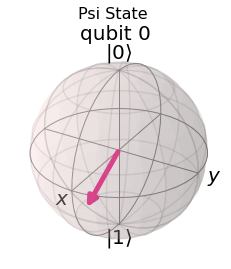

In [16]:
psi_s = Statevector(psi)
display(psi_s.draw(output = 'bloch', title="Psi State"))

We are going to run this on the `statevector_simulator` because it allows us to take `snapshots` which are like a view into the statevector at any moment along the circuit.

We wrote the following for you so **leave it as it is** and run each cell to see if you have **solved the challenge!**

## 1. Create the Circuit
Each of the registers should be named including two separate classical registers.

The `snapshots` should look like a vertical gray bar. 

In [19]:
# Make sure you return the QuantumCircuit and both classical registers as a tuple!
# e.g. return (qc, c_0, c_1)
qc, c_0, c_1 = create_registers_and_circuit()

# Alice intializes a quantum state
alice_initialise_psi(psi)

# Use a snapshot to record the initial statevector (this is for checking after)
qc.snapshot('1')

# Charlie creates the Bell pair
create_bell_pair(qc, 1, 2)
qc.barrier()

# Alice does gate prep
alice_gates(qc, 0, 1)
qc.barrier()

# Alice measures her state and sends to Bob
measure_and_send(qc, 0, 1, 0, 1)
qc.barrier()

# Bob decodes the classical bits and re-creates Psi
bob_gates(qc, 2, c_0, c_1)

# Use snapshot to record the final statevector  (this is for checking after)
qc.snapshot('2')  

# Draw it!
qc.draw()

CircuitError: 'Index 2 out of range for size 2.'

## 2. Run it on the Statevector Simulator
Like normal, we will run our circuit on a simulator and pull the results out of the return object.

<div class="alert alert-info"><b><i>N.B.</i></b>
    Notice that we are not calling <code>get counts</code> here, instead we are going to read the snapshots and directly check if the state has been teleported across the circuit!
</div>

In [38]:
# Execute the circuit on the simulated backend
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()

## 3. Check if it's Worked!

We made a function called `check_same_state`, by passing the simulation `result` object, it can pull out the statevectors from the snapshots!

It will tell you Alice's and Bob's state and check if they are close enough to be the same.

In [39]:
def check_same_state(result):
    # A little extra style
    def green(string):
        return ('\033[92m' + string + '\033[0m')
    def red(string):
        return ('\033[91m' + string + '\033[0m')
    try:
        # Put our snapshots into a list
        snapshots = result.data()['snapshots']['statevector']

        # Get Alice's state:
        alice_state = snapshots['1']

        # Get Bob's final state:
        bob_state = snapshots['2']

        a = alice_state[0][:2]
        b = [c for c in bob_state[0] if c != 0]
        # Account for a single state in bob's statevector
        if len(b) < 2: b.append(bob_state[0][1])
        
        # print("Psi state: ", psi[0], psi[1])
        print(f"Alice's state: {a[0]:.4f} {a[1]:.4f}")
        plt.close("all")
        display(Statevector(a).draw(output = 'bloch', title="Alice's State"))
        print(f"Bob's state: {b[0]:.4f} {b[1]:.4f}")
        plt.close("all")
        display(Statevector(b).draw(output = 'bloch', title="Bob's State"))
        # For simplicity I am rounding and summing to check for equality
        
        if np.round(a[0]+a[1], 5) == np.round(b[0]+ b[1], 5):
            print(green("State Successfully Teleported! Good Job!"))
        else:
            print(red("Bob did not get the same state as Alice! Check your code and try again!"))
    except:
        print(red("Error: Something went wrong while running the checker function! Check your code and try again!"))

# Check if it's the same state
check_same_state(result)

Error: Something went wrong while running the checker function! Check your code and try again!


---
<h2 style="text-align: center; color: darkblue"> Well Done! </h2>

---

<img src="https://thumbs.gfycat.com/LikableUnfortunateCaecilian-size_restricted.gif" width="500" align="center">


# That was hard! Well done for getting to the end! 

If something went wrong, don't panic! There is a whole lot going on in this challenge notebook, try again or come to office hours - We can always solve it together!

---
### After you successfully implement teleportation, try changing Alice's state $|\Psi\rangle$, and see if it is successfully teleported every time! When you change this state, make sure that the state you are using is normalized.


## Do you want to learn more about teleportation? 

Why does Alice use the exact gates she does? Why does Bob use either an X gate, or a Z gate, or both?

Check out the <a href="https://qiskit.org/textbook/ch-algorithms/teleportation.html"> Qiskit textook page on teleportation to learn the math behind the protocol! 

### © 2022 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*